# Portfolio 2: Analysing COVID-19 Data

For this portfolio we'll look at the most relevant dataset to our lives at the moment: the global spread of COVID-19.   There is an open dataset avaialable that is updated often showing the number of cases in different regions of the world.  This is the source of the graphs and visualisations that you'll see on the news. 

Here are some sample stories for reference:

* [From the ABC](https://www.abc.net.au/news/2020-03-26/coronavirus-covid19-global-spread-data-explained/12089028)
* [From the Guardian](https://www.theguardian.com/australia-news/datablog/ng-interactive/2020/apr/06/coronavirus-cases-in-australia-map-curve-confirmed-numbers-stats-how-many-covid-19-nsw-by-postcode-maps-victoria-live-data-qld-sa-wa-tas-nt-act-latest-statistics)
* [Coronavirus in Australia](https://www.covid19data.com.au/)
* [ArcGIS Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) Johns Hopkins


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random as randn
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime

import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline



## Getting the Data

The first step is to get a copy of the raw data.  The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). We're interested in the global confirmed cases dataset but you can also get data on deaths and recovered cases.  

You can either download a copy of the data into your project or just read it from the URL. The advantage of reading the URL is that you'll get live updates, but this might make it harder for you to repeat your experiments if the data changes.  Also, you would be making new requests for data every time you ran your worksheet putting load on the server (and your own network connection).  Consider downloading a copy as you are developing your worksheet and then switching to the live version once everything is debugged. (Eg. you could clone the github repository and copy the relevant data file into this project).

In [5]:
# load the live dataset, assumes a working network connection
# covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv('data/time_series_covid19_confirmed_global.csv', index_col='Province/State', parse_dates= True)

covid.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [6]:
Country = covid[['Country/Region']]

# Explore the Data

The format of this data is one row per geographical region with columns for Lat/Long and then one column for each day's data.  Most regions are countries but in some cases, as in Australia, they are states.  

For the analysis we want to do we'll look at data for countries only, so the first operation on the data frame is to combine all of the rows for countries like Australia that are split into states.  We then want to drop the non-numeric columns to leave us with just the numbers on each day for each country.  This can be done using the [`groupby`](https://pandas.pydata.org/docs/getting_started/10min.html#grouping) method and the [`drop`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method.  We can use these to make a new dataframe containing just the numerical data.

In [7]:
# group the columns by sum of cases per country
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])



I selected a country [using the `loc` method](https://pandas.pydata.org/docs/getting_started/10min.html#selection) since the new dataframe will have the grouped values (Countries) as the row labels. Select the data for one country (you choose which) and plot it.  You should see the exponential rise in case numbers over time.

In [8]:
#selected data for just one country
c_column = grouped.loc[['China']]





In [9]:
c_column.index.name = 'date'
c_column

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
date,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,84024,84029,84038,84044,84054,84063,84063,84063,84063,84081


In [10]:
date_1 = pd.to_datetime(['1/22/2020',np.datetime64('2020-01-22'),datetime.datetime(2020,1,22)])

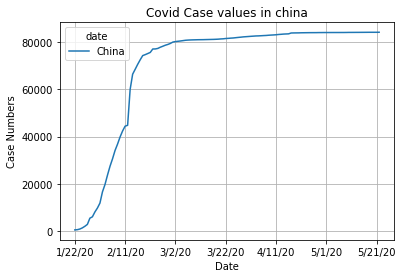

In [11]:
c_column.T.plot()
plt.grid()
plt.title("Covid Case values in china")
plt.ylabel("Case Numbers")
plt.xlabel("Date")
# plt.tick_params(axis='both',labelsize=14)
plt.show()



The graph above shows the rise in the amount of coronavirus cases. From the first case at 1/22/20 to 4/23/20


## Comparing Countries

This level shows a comparison between countries. Selected suitable countries would be those who have significant outbreaks and plotted their data on the same graph to reproduce visualisation. 

In [134]:
#  select countries with significant outbreaks
sig_countries  = grouped.reindex(['USA', 'China', 'Australia', 'Italy', 'UK' ])
sig_countries


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,9802.0,...,84024.0,84029.0,84038.0,84044.0,84054.0,84063.0,84063.0,84063.0,84063.0,84081.0
Australia,0.0,0.0,0.0,0.0,4.0,5.0,5.0,6.0,9.0,9.0,...,6989.0,7019.0,7035.0,7044.0,7054.0,7068.0,7072.0,7081.0,7095.0,7099.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,222104.0,223096.0,223885.0,224760.0,225435.0,225886.0,226699.0,227364.0,228006.0,228658.0
UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#drop countries with no values
top_countries = sig_countries.dropna()
top_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,9802.0,...,84024.0,84029.0,84038.0,84044.0,84054.0,84063.0,84063.0,84063.0,84063.0,84081.0
Australia,0.0,0.0,0.0,0.0,4.0,5.0,5.0,6.0,9.0,9.0,...,6989.0,7019.0,7035.0,7044.0,7054.0,7068.0,7072.0,7081.0,7095.0,7099.0
Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,222104.0,223096.0,223885.0,224760.0,225435.0,225886.0,226699.0,227364.0,228006.0,228658.0


In [14]:
date = pd.to_datetime(['1/22/2020',np.datetime64('2020-01-22'),datetime.datetime(2020,1,22)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a15bd3c90>,
      dtype=object)

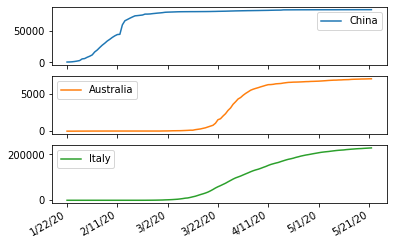

In [15]:
top_countries.T.plot(subplots = True)

# Visualisation of countries with more than 100 confirmed Covid cases

In [16]:
covid = covid.drop(columns=['Lat', 'Long'])

#created a function to merge datasets to make it look presentable in order to plot graph seamlessly
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Country/Region'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Country/Region','Date'])
    return df_cleaned 

# Clean all datasets
CovidCases=cleandata(covid)

In [22]:
#Sorting Countries based on Max values
TotalCasesCountry=CovidCases.max(level=0)['Cases'].reset_index().set_index('Country/Region')
TotalCasesCountry=TotalCasesCountry.sort_values(by='Cases',ascending=True)
TotalCasesCountryexclChina=TotalCasesCountry[~TotalCasesCountry.index.isin(['Mainland China','Others'])]
Top10countriesbycasesexclChina=TotalCasesCountryexclChina
TotalCasesCountrytop10=TotalCasesCountry
TotalCasesCountrytop10

,Cases
Country/Region,
Lesotho,2
Western Sahara,6
Papua New Guinea,8
MS Zaandam,9
Seychelles,11
...,...
Spain,234824
United Kingdom,254195
Russia,326448


In [23]:
#Selecting the Countries based on the values greater than 100
TotalCasesCountrygrt100 = TotalCasesCountrytop10['Cases'] >= 100
Top100 = TotalCasesCountrytop10[['Country/Region'] & TotalCasesCountrygrt100 ].head(5)
Top100

,Cases
Country/Region,
Trinidad and Tobago,116
Cambodia,123
Guyana,127
Brunei,141
Mongolia,141


Text(0.5, 0, 'Case Number')

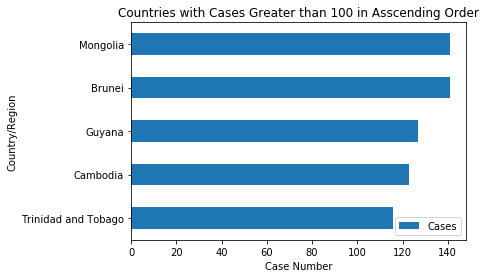

In [24]:
Top100.plot(kind = 'barh')
plt.title("Countries with Cases Greater than 100 in Asscending Order")
# plt.ylabel("Case Numbers")
plt.xlabel("Case Number")

## Normalisation by Population

The raw data includes the overall count of cases in each country. Clearly small countries will have smaller overall values than large countries.  It would be interesting to see whether the number of cases in China and the US was more per-capita than those in other countries and find which country has the highest number as a proportion of the population. (A good way to measure this is the number of cases per million people in the population. If a country has 25 cases and a population of 2.5 million they would have 10 cases per million).

To answer these questions we need population data. I'll present two possible sources of data (there are more of course) [datahub.io](https://datahub.io/JohnSnowLabs/population-figures-by-country) has data per country up to 2016 in a handy CSV format. The [United Nations Population Dynamics page](https://population.un.org/wpp/Download/Standard/CSV/) has data that predicts populations up to 2100 in CSV format.  Use one of these data sets to compute the number of confirmed cases for each country per million population.   Create a new plot with this data. Create a plot to compare the most recent day's data - which country has the most cases per million right now? 

_Note, to use the population data you'll have to make sure that the country names match up in the different data sets. There's no magic way to do this, either you edit one of the datasets or write code to modify the data once you read it in.  The second of these is better because it makes it easy for someone else to repeat your analysis._

In [26]:
covid_pop = pd.read_csv('data/WPP2019_TotalPopulationBySex.csv')
covid_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [33]:

# Rename Location column 
CovidPop = covid_pop.rename(columns={'Location': 'Country/Region'})
CovidPop

# Group columns by Country/Region
CovidPop = CovidPop.groupby('Country/Region').sum()

# Drop the redundant columns
CovidPop = CovidPop.drop(columns=['LocID', 'VarID', 'Time', 'MidPeriod', 'PopMale', 'PopFemale', 'PopDensity'])
CovidPop.head()



,PopTotal
Country/Region,
Afghanistan,6.376846e+07
Africa,2.486424e+09
African Group,2.753551e+08
African Union,2.754555e+08
African Union: Central Africa,3.633273e+07


In [34]:
CovidPop_Cases = CovidCases.join(CovidPop)
CovidPop_Cases


,,Cases,PopTotal
Country/Region,Date,,
Afghanistan,1/22/20,0,6.376846e+07
Albania,1/22/20,0,2.051488e+06
Algeria,1/22/20,0,5.402851e+07
Andorra,1/22/20,0,6.024647e+04
Angola,1/22/20,0,8.488583e+07
...,...,...,...
Sao Tome and Principe,5/22/20,251,3.988019e+05
Yemen,5/22/20,209,4.416685e+07
Comoros,5/22/20,78,1.405937e+06


In [55]:
# normalizing the dataframe
CovidPop_Cases['Cases/Million'] = CovidPop_Cases['PopTotal']/CovidPop_Cases['Cases']


,,Cases,PopTotal,Cases/Million
Country/Region,Date,,,
Grenada,4/22/20,15,98715.674,6581.044933


In [56]:
CovidPop_Cases['Cases/Million'] = CovidPop_Cases['Cases/Million']* 100000

In [57]:
# Create a plot to show cases for each country per population capita
#first drop Pop Total
Cases_CounPop = CovidPop_Cases.drop(columns=['PopTotal'])
Cases_CounPop.sample(5)
# Reset the index 
Cases_CounPop.reset_index()


,Country/Region,Date,Cases,Cases/Million
0,Afghanistan,1/22/20,0,inf
1,Albania,1/22/20,0,inf
2,Algeria,1/22/20,0,inf
3,Andorra,1/22/20,0,inf
4,Angola,1/22/20,0,inf
...,...,...,...,...
32447,Sao Tome and Principe,5/22/20,251,1.588852e+08
32448,Yemen,5/22/20,209,2.113246e+10
32449,Comoros,5/22/20,78,1.802484e+09
32450,Tajikistan,5/22/20,2551,6.122614e+08


In [45]:
#Sorting Countries based on Max values
MaxCasesCountry=Cases_CounPop.sort_values(by='Cases',ascending=False)
MaxCasesCountry.head(10)


Cases  Cases/Million
Country/Region Date                           
US             5/22/20  1600937            NaN
               5/21/20  1577147            NaN
               5/20/20  1551853            NaN
               5/19/20  1528568            NaN
               5/18/20  1508308            NaN
               5/17/20  1486757            NaN
               5/16/20  1467820            NaN
               5/15/20  1442824            NaN
               5/14/20  1417774            NaN
               5/13/20  1390406            NaN

USA has the most largest cases

In [46]:
MaxCasesCountry.reset_index()



,Country/Region,Date,Cases,Cases/Million
0,US,5/22/20,1600937,NaN
1,US,5/21/20,1577147,NaN
2,US,5/20/20,1551853,NaN
3,US,5/19/20,1528568,NaN
4,US,5/18/20,1508308,NaN
...,...,...,...,...
32447,Mauritius,2/23/20,0,inf
32448,Mauritania,2/23/20,0,inf
32449,Malta,2/23/20,0,inf
32450,Maldives,2/23/20,0,inf


In [49]:
MaxCases = MaxCasesCountry.loc[['US']]
# MaxCases = MaxCasesCountry.loc[['China']]
                                



array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a163e8c10>,
      dtype=object)

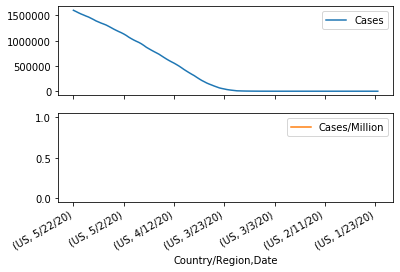

In [50]:
MaxCases.plot(subplots= True)

I normalized the dataset earlier to show the cases per the population rise each day. US had te highest population per rise in cases as show in the graph.

## A Predictive Model

It is well understood that the spread of the virus follows an exponential pattern. This is because each infected person infects more than one new person on average, leading to exponential growth.  This is why the key to stopping the growth of the pandemic is to reduce the number of people infected by stopping contact and isolating infected poeple. 

An exponential curve has the equation $y = e^{mx}$. It can be converted to a linear relationship by taking the logarithm of each side: $log(y) = mx$.  This means that we can fit a linear regression model to the data as long as we take the log of the number of cases. 

To show exponential curve, I built an EDA to visualize a growth in cases in China and predicted the log cases. The graph shows an forcasted rise in cases if the virus the virus wasn't contained.|

In [59]:
# Select records for China
ChinaCases = CovidCases.loc[['China']]
ChinaCases


Cases
Country/Region Date          
China          1/22/20      1
               1/22/20     14
               1/22/20      6
               1/22/20      1
               1/22/20      0
...                       ...
               5/22/20    192
               5/22/20      1
               5/22/20     76
               5/22/20    185
               5/22/20   1268

[4026 rows x 1 columns]

In [106]:
ChinaCases1 = ChinaCases.reset_index()
China_Cases1 = ChinaCases1.reset_index()
China_Cases1.columns

Index(['index', 'Country/Region', 'Date', 'Cases', 'LogCases'], dtype='object')

In [107]:
# Rename Location column 
ChinaExpGrowth = China_Cases1.rename(columns={'index': 'Days'})
ChinaExpGrowth

,Days,Country/Region,Date,Cases,LogCases
0,0,China,1/22/20,1,0.000000
1,1,China,1/22/20,14,2.639057
2,2,China,1/22/20,6,1.791759
3,3,China,1/22/20,1,0.000000
4,4,China,1/22/20,0,-inf
...,...,...,...,...,...
4021,4021,China,5/22/20,192,5.257495
4022,4022,China,5/22/20,1,0.000000
4023,4023,China,5/22/20,76,4.330733
4024,4024,China,5/22/20,185,5.220356


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23f5a8d0>,
      dtype=object)

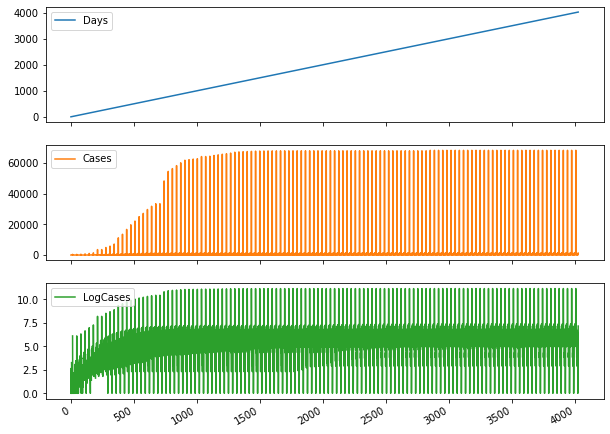

In [140]:
ChinaExpGrowth.plot(subplots=True, figsize=(10, 8) )

The graph shows the exponential rise in the cases in China

In [130]:
country = ChinaExpGrowth['Country/Region']
